In [25]:
import os
import sys
import json
from tqdm import tqdm_notebook as tqdm
from pprint import pprint

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

## data load

In [19]:
BASE_DIR = '../mnt/inputs/features/train'
# BASE_DIR = '../mnt/inputs/features/test'

In [7]:
!ls $BASE_DIR

EncodingTitles.pkl  KernelBasics2.pkl	      SessionTime2.pkl
EventCount.pkl	    KernelBasics3.pkl	      Worldcount.pkl
EventCount2.pkl     PrevAssessAccByTitle.pkl


In [20]:
kernel_basics2_df = pd.read_pickle(f'{BASE_DIR}/KernelBasics2.pkl')
kernel_basics3_df = pd.read_pickle(f'{BASE_DIR}/KernelBasics3.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '../mnt/inputs/features/train/KernelBasics3.pkl'

In [10]:
kernel_basics2_df.head()

,12 Monkeys,Air Show,All Star Sorting,Balancing Act,Bird Measurer (Assessment),Bottle Filler (Activity),Bubble Bath,Bug Measurer (Activity),Cart Balancer (Assessment),Cauldron Filler (Assessment),...,prev_acc_gr_-99,prev_acc_gr_0,prev_acc_gr_1,prev_acc_gr_2,prev_acc_gr_3,prev_cumnum_c,prev_cumnum_inc,prev_num_corrects,prev_num_incorrects,type
25,0,0,1960,0,0,0,0,33,30,0,...,1,0,0,0,0,1,0,0,0,Assessment
57,0,123,64,0,82,349,96,74,15,36,...,1,0,0,0,0,4,7,0,0,Assessment
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Assessment
13,0,0,77,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Assessment
24,0,0,610,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Assessment


In [11]:
kernel_basics3_df.head()

,12 Monkeys,Air Show,All Star Sorting,Balancing Act,Bird Measurer (Assessment),Bottle Filler (Activity),Bubble Bath,Bug Measurer (Activity),Cart Balancer (Assessment),Cauldron Filler (Assessment),...,prev_acc_gr_-99,prev_acc_gr_0,prev_acc_gr_1,prev_acc_gr_2,prev_acc_gr_3,prev_cumnum_c,prev_cumnum_inc,prev_num_corrects,prev_num_incorrects,type
25,0,0,1960,0,0,0,0,33,30,0,...,1,0,0,0,0,1,0,0,0,Assessment
57,0,123,64,0,82,349,96,74,15,36,...,1,0,0,0,0,4,7,0,0,Assessment
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Assessment
13,0,0,77,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Assessment
24,0,0,610,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Assessment


In [21]:
for col in kernel_basics3_df.columns:
    res = (kernel_basics2_df[col] == kernel_basics3_df[col]).values
    # print(f'{col}: \t{res.all()}')
    print(f'{col}: \t{res.mean()}')

ValueError: Can only compare identically-labeled Series objects

In [13]:
# 結論、test は完全一致

#### trn についてみてみる

In [24]:
trn_kernel_basic_2_df = pd.read_pickle('../mnt/inputs/features/train/KernelBasics2.pkl')
trn_kernel_basic_3_df = pd.read_pickle('../mnt/inputs/features/train/KernelBasics3.pkl')

In [23]:
trn_kernel_basic_3_df.head()

,12 Monkeys,Air Show,All Star Sorting,Balancing Act,Bird Measurer (Assessment),Bottle Filler (Activity),Bubble Bath,Bug Measurer (Activity),Cart Balancer (Assessment),Cauldron Filler (Assessment),...,prev_acc_gr_-99,prev_acc_gr_0,prev_acc_gr_1,prev_acc_gr_2,prev_acc_gr_3,prev_cumnum_c,prev_cumnum_inc,prev_num_corrects,prev_num_incorrects,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Clip
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Clip
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Activity
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Activity
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Game


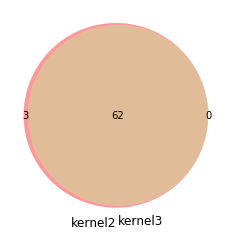

In [27]:
venn2([set(trn_kernel_basic_2_df.columns), set(trn_kernel_basic_3_df.columns)], set_labels=['kernel2', 'kernel3'])

In [28]:
set(trn_kernel_basic_2_df.columns) - set(trn_kernel_basic_3_df.columns)

{'accuracy', 'accuracy_group', 'title'}

In [44]:
trn_kernel_basic_2_df.game_session.unique()

array(['901acc108f55a5a1', '77b8ee947eb84b4e', '6bdf9623adc94d89', ...,
       'dadd1a4d8ac68ab0', 'a6885ab824fbc32c', '5448d652309a6324'],
      dtype=object)

In [52]:
for col in trn_kernel_basic_3_df.columns:
    series_2 =trn_kernel_basic_2_df.sort_values('game_session')[col] 
    series_3 = trn_kernel_basic_3_df.query(f'game_session in {list(trn_kernel_basic_2_df.game_session.unique())}').sort_values('game_session')[col]
    res = (series_2.values == series_3.values)
    # res = (trn_kernel_basic_2_df[col] == trn_kernel_basic_3_df[col]).values
    # print(f'{col}: \t{res.all()}')
    print(f'{col}: \t{res.mean()}')

12 Monkeys: 	1.0
Air Show: 	1.0
All Star Sorting: 	1.0
Balancing Act: 	1.0
Bird Measurer (Assessment): 	1.0
Bottle Filler (Activity): 	1.0
Bubble Bath: 	1.0
Bug Measurer (Activity): 	1.0
Cart Balancer (Assessment): 	1.0
Cauldron Filler (Assessment): 	1.0
Chest Sorter (Assessment): 	1.0
Chicken Balancer (Activity): 	1.0
Chow Time: 	1.0
Costume Box: 	1.0
Crystal Caves - Level 1: 	1.0
Crystal Caves - Level 2: 	1.0
Crystal Caves - Level 3: 	1.0
Crystals Rule: 	1.0
Dino Dive: 	1.0
Dino Drink: 	1.0
Egg Dropper (Activity): 	1.0
Fireworks (Activity): 	1.0
Flower Waterer (Activity): 	1.0
Happy Camel: 	1.0
Heavy, Heavier, Heaviest: 	1.0
Honey Cake: 	1.0
Leaf Leader: 	1.0
Lifting Heavy Things: 	1.0
Magma Peak - Level 1: 	1.0
Magma Peak - Level 2: 	1.0
Mushroom Sorter (Assessment): 	1.0
Ordering Spheres: 	1.0
Pan Balance: 	1.0
Pirate's Tale: 	1.0
Rulers: 	1.0
Sandcastle Builder (Activity): 	1.0
Scrub-A-Dub: 	1.0
Slop Problem: 	1.0
Treasure Map: 	1.0
Tree Top City - Level 1: 	1.0
Tree Top City - Le

In [51]:
series_2.shape, series_3.shape

((17690,), (17690,))

In [34]:
trn_kernel_basic_2_df.head()

,12 Monkeys,Air Show,All Star Sorting,Balancing Act,Bird Measurer (Assessment),Bottle Filler (Activity),Bubble Bath,Bug Measurer (Activity),Cart Balancer (Assessment),Cauldron Filler (Assessment),...,prev_acc_gr_0,prev_acc_gr_1,prev_acc_gr_2,prev_acc_gr_3,prev_cumnum_c,prev_cumnum_inc,prev_num_corrects,prev_num_incorrects,title,type
0,0,0,164,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Mushroom Sorter (Assessment),Assessment
1,0,193,164,0,0,0,0,104,0,0,...,0,0,0,1,1,0,1,0,Bird Measurer (Assessment),Assessment
2,0,193,164,0,92,0,0,104,0,0,...,1,0,0,0,1,11,0,11,Mushroom Sorter (Assessment),Assessment
3,0,193,231,0,92,165,133,104,0,0,...,0,0,0,1,2,11,1,0,Mushroom Sorter (Assessment),Assessment
4,0,337,231,0,92,165,133,185,0,0,...,0,0,1,0,3,12,1,1,Bird Measurer (Assessment),Assessment


In [38]:
trn_kernel_basic_3_df.query('type == "Assessment"').columns

Index(['12 Monkeys', 'Air Show', 'All Star Sorting', 'Balancing Act',
       'Bird Measurer (Assessment)', 'Bottle Filler (Activity)', 'Bubble Bath',
       'Bug Measurer (Activity)', 'Cart Balancer (Assessment)',
       'Cauldron Filler (Assessment)', 'Chest Sorter (Assessment)',
       'Chicken Balancer (Activity)', 'Chow Time', 'Costume Box',
       'Crystal Caves - Level 1', 'Crystal Caves - Level 2',
       'Crystal Caves - Level 3', 'Crystals Rule', 'Dino Dive', 'Dino Drink',
       'Egg Dropper (Activity)', 'Fireworks (Activity)',
       'Flower Waterer (Activity)', 'Happy Camel', 'Heavy, Heavier, Heaviest',
       'Honey Cake', 'Leaf Leader', 'Lifting Heavy Things',
       'Magma Peak - Level 1', 'Magma Peak - Level 2',
       'Mushroom Sorter (Assessment)', 'Ordering Spheres', 'Pan Balance',
       'Pirate's Tale', 'Rulers', 'Sandcastle Builder (Activity)',
       'Scrub-A-Dub', 'Slop Problem', 'Treasure Map',
       'Tree Top City - Level 1', 'Tree Top City - Level 2',
      